____

<font size=+3 color=#AA55FF> HW: Classification </font>

____

_____

<font size=+1 color=#FF55AA> Read Chapter 3 (2 points)</font> 

____

Read chapter three of your textbook. As always, read through the questions at the end of the chapter and read the author's solutions. 

Because of the format of next week, which is two ICAs without a lecture, you will rely a bit more on the textbook. In particular, pay attention to metrics (e.g., precision-recall). I will lecture on this the next week, but you will need a bit of this for the ICAs before I get to that lecture. 

#### I read through the textbook.

_____

<font size=+1 color=#FF55AA> Linear Algebra Practice: Moore-Penrose Pseudoinverse (8 points) </font>

____

As we did last week, we'll practice/review some basic math to be sure we are ready for what is coming in the next chapter. 

Using only linear algebra, and only matrix-operation [libraries](https://numpy.org/doc/stable/reference/routines.linalg.html) from `numpy.linalg`, fit this

$$y(x) = A + B\sin(x) + 2C\sin(2x) $$

to this data:

In [1]:
import numpy as np

In [2]:
x_data = np.array([0.0, 0.38468481472528077, 0.7693696294505615, 1.1540544441758422,
1.538739258901123 ,1.9234240736264039 ,2.3081088883516845 ,2.6927937030769655 ,
3.077478517802246 ,3.4621633325275267 ,3.8468481472528078 ,4.231532961978089 ,
4.616217776703369 ,5.00090259142865 ,5.385587406153931 ,5.770272220879211 ,
6.154957035604492 ,6.539641850329773 ,6.9243266650550535 ,7.3090114797803345 ,7.6936962945056155 ,8.078381109230897 ,
8.463065923956178 ,8.847750738681457 ,9.232435553406738 ,9.617120368132019 ,
10.0018051828573 ,10.386489997582581 ,10.771174812307862 ,11.155859627033141 ,
11.540544441758422 ,11.925229256483703 ,12.309914071208985 ,12.694598885934266 ,
13.079283700659547 ,13.463968515384828 ,13.848653330110107 ,14.233338144835388 ,
14.618022959560669 ,15.00270777428595 ,15.387392589011231 ,15.772077403736512 ,
16.156762218461793 ,16.541447033187072 ,16.926131847912355 ,17.310816662637635 ,
17.695501477362914 ,18.080186292088197 ,18.464871106813476 ,18.84955592153876])

y_data = np.array([3.331219274428324 ,8.69117177354271 ,11.389587728692112 ,10.582982929480709 ,
6.59505226878869 ,1.8327347116764117 ,-0.7587726904365493 ,-0.2992675189423395 ,2.31307601611185 ,
5.849217037738924 ,7.617986855661746 ,5.216726354134512 ,1.3327383568195394 ,-3.281685958530992 ,
-5.486617764067326 ,-3.8870344617279637 ,1.1102665620528465 ,6.757762356554048 ,11.111990093632086 ,
11.32579564359347 ,8.308852001252975 ,3.510186297401523 ,-0.20113018082278786 ,-0.7090109375374243 ,
1.3356102132729253 ,4.636051488161325 ,7.169311674106334 ,6.396687565935798 ,2.925279406867363 ,
-1.9685714087808237 ,-4.749376695652413 ,-4.58103399947796 ,-0.6233751866353092 ,5.200557814727829 ,
10.017125211797795 ,11.578949862582213 ,9.576021244129453 ,5.544905227282073 ,0.9249326779831479 ,
-0.7600736332460936 ,0.5145018212669913 ,3.7604735805031875 ,6.740496177580371 ,7.2803529906201 ,
4.493774367361679 ,-0.370911627120569 ,-4.327001610591308 ,-5.014070727398992 ,-2.551251566413526 ,
3.154595931119781])

### Set Up Matrix Equation for Linear Regression

The given model is $y(x) = A + B\sin(x) + 2C\sin(2x)$. We can represent this in matrix form as:

$ Y = X \cdot \beta $

where:
- $ Y $ is the vector of observed values (in this case, `y_data`).
- $ X $ is the matrix of input features, where each column represents a different term in the model (constant, $\sin(x)$, and $2\sin(2x)$).
- $ \beta$ is the vector of coefficients to be determined. (A,B,C)



In [4]:
# Construct the matrix X
X = np.column_stack([np.sin(x_data), 2*np.sin(2 * x_data)])

# Add a column of ones for the intercept term (A)
X = np.column_stack([np.ones_like(x_data), X])

# Construct the target vector Y
Y = y_data.reshape(-1, 1)

# Use linear algebra to find the coefficients beta
beta, _, _, _ = np.linalg.lstsq(X, Y, rcond=None)

# Extract the coefficients A, B, C
A, B, C = beta.flatten()

# Display the results
print("A: {:.2f}, B: {:.2f}, C: {:.2f}".format(A,B,C))

A: 3.17, B: 3.11, C: 3.11



$$A = 3.17$$
$$B = 3.11$$
$$C = 3.11$$


Plot the data and the function $y(x)$ with your fit parameters to show visually how well the model and parameters capture the data. 

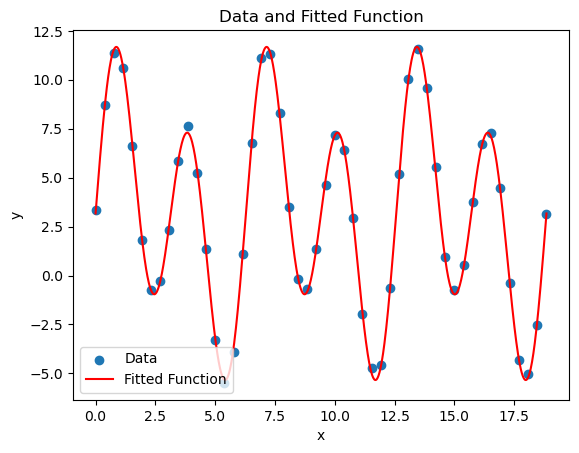

In [6]:
import matplotlib.pyplot as plt

# Fitted parameters
A = 3.17
B = 3.11
C = 3.11

# Function to calculate y(x) for the given parameters
def y_function(x):
    return A + B * np.sin(x) + 2 * C * np.sin(2 * x)

# Generate x values for the plot
x_plot = np.linspace(0, 18.84955592153876, 1000)

# Calculate y values using the fitted parameters
y_plot = y_function(x_plot)

# Plot the data points
plt.scatter(x_data, y_data, label='Data')

# Plot the fitted function
plt.plot(x_plot, y_plot, label='Fitted Function', color='red')

# Add labels and a legend
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data and Fitted Function')
plt.legend()

# Show the plot
plt.show()

_____

<font size=+1 color=#FF55AA> Projects (30 points) </font>

____

In this problem, write a short "essay" on your ideas for your project. You can, and probably will, change your mind later; but, this serves the purpose of getting you to a solid set of decisions for your project. 

The most important aspect of your project is that it should have a goal. Think about a set of goals you might have for your project. You might only have one idea in mind, because you have a great dataset for yout thesis work. Great! Or, you might be less sure of what you want to do: perhaps make a chatbot, a robot, sports, finance, ...., whatever. Your project cannot be: _I got this dataset and ran it through these estimators._ There needs to be a goal you have in mind. Summarize your thinking on what you want to do. 

Next, for each of your possible goals, list places you might find data. Maybe you are making the data yourself, maybe you have a large text corpus, or you want to use one of the MNIST drop-ins. There needs to be a clear match between your goal and the existence of a dataset to learn from. If you are interested in reinforcement learning, you will need a platform from which you can learn from - this could be a real robot, for example. Or, it might be a model of something like a video game. 

If you are interested in reinforcement learning, I highly recommend [looking here](https://gymnasium.farama.org/index.html) for platform to learn from. 

You should be up to two detailed paragraphs so far. Next, write about the workflow you plan to use. We have seen a few possible workflows so far, but each of you will have a unique variant that matches your project. 

Fourth paragraph: discuss your risk mitigation strategy. What if your project doesn't work? What will you do? 

In the next few weeks, you will begin to explore your data and write preproposals that will be reviewed by your classmates. 


#### Plan of the final project

For my project, the primary goal is to train a denoising network that can effectively remove artifacts from EEG data. This goal is driven by the need to enhance the quality of EEG signals by eliminating noise and artifacts, thus improving the accuracy of subsequent analyses and applications in neuroscience. The denoising network will be a crucial tool in preprocessing EEG data, providing a cleaner and more reliable dataset for further analysis.

To achieve this goal, I have identified potential sources for data. One option is to collect my own EEG data using our lab equipment. Alternatively, I can leverage publicly available datasets related to EEG recordings, which can be accessed from repositories or research databases. These datasets may contain examples of EEG signals with various types of artifacts, enabling a diverse and comprehensive training set for the denoising network. 

In terms of workflow, I envision a process that includes data collection or retrieval, preprocessing to generate clean and noisy datasets, network architecture design and training, and thorough evaluation of the denoising performance. I will employ suitable deep learning frameworks and tools for implementing and training the denoising network. 

For risk mitigation, in the event that my project does not yield the desired results, I have a contingency plan. I can fall back on my previous experience in image reconstruction methods, applying lessons learned from that project to develop an alternative final project. 


_____

<font size=+1 color=#FF55AA> Classification: Iris Dataset (30 points) </font>

____

This problem is broken into six sections and will walk you through an ML workflow for classification. This will ensure you understand and can carry out the basic steps from start to finish. Your project will be analogous to this. I will provide no code so that you become comfortable with starting completely from scratch, as your project will be. But, I'll guide you through the steps.

_____

<font size=+1 color=#55FFAA> Part 1: EDA </font>

____

1. Using `sklearn`, read in the [iris dataset](https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html).
2. Perform EDA on this dataset, using a selection of visualization tools. For [example](https://www.w3resource.com/w3r_images/python-machine-learning-scikit-learn-iris-visualization-exercise-13.png), use `seaborn`'s `pairplot`.
3. Comment on your findings.  Give an in-depth discussion on what you expect from this dataset in terms of your ability to use classification. For example, are some classes likely to be harder/easier than others? 


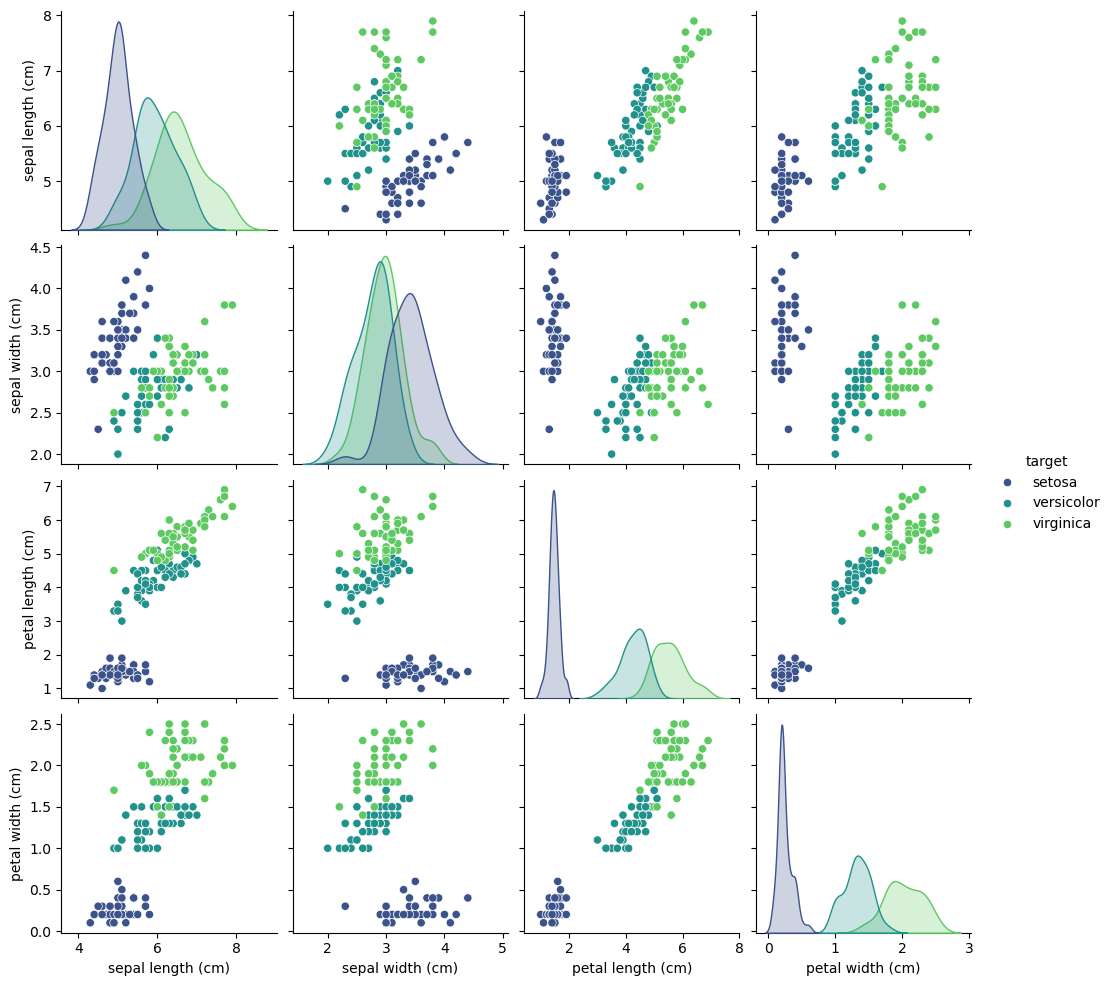

In [29]:
# Import libraries
import seaborn as sns
import pandas as pd
from sklearn.datasets import load_iris

# Load the iris dataset
iris = load_iris()
data = iris.data
target = iris.target
class_names = iris.target_names  # Retrieve class names

#Create a DataFrame for visualization
iris_df = pd.DataFrame(data, columns=iris.feature_names)
iris_df['target'] = [class_names[i] for i in target]

#Perform EDA using seaborn's pairplot
sns.pairplot(iris_df, hue='target', palette='viridis')


In [32]:
target 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
# shape of the dataset
print("Shape of the dataset:", data.shape)

> Setosa is highly distinguishable from the other species, especially in terms of petal length and petal width. So it will be easier to separate it out. But for Versicolor and Virginica show some overlap, particularly in sepal measurements. So that will be harder to work with.

_____

<font size=+1 color=#55FFAA> Part 2: Preprocessing </font>

____

One of the goals of this HW is to understand the importance of the size of the dataset. Write code that builds several $X$ and $y$ datasets with two different characteristics:
1. the number of rows can be varied to allow you to degrade the quality of the data,
2. create various $X$ with dimensions $2, 3, 4$ so that you can explore the role of dimensionality on the results.

Look at the scale of the data values. Use the $z$-score to scale your data, and save original copies, again so that you can compare scaling versus no scaling. Do this _also_ with the variants mentioned above so that you have many combinations to explore. Visually look at the scaled data to understand what will be going into the ML. (Below, you will include the scaling as part of a pipeline.) 

Some ML estimators are more or less sensitive to scaling, and you'll explore that below. 


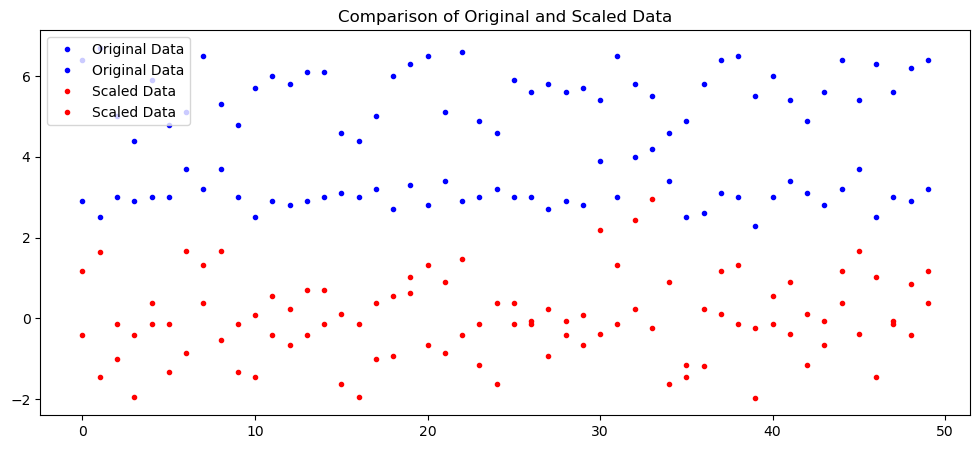

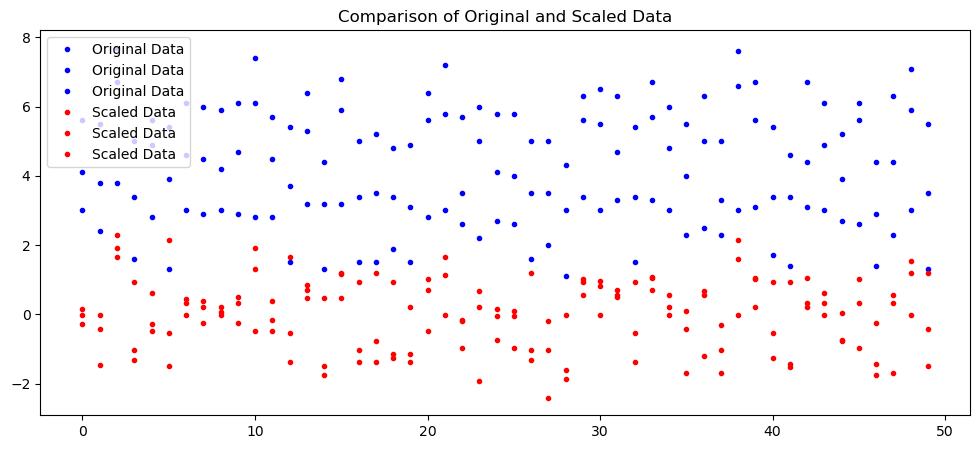

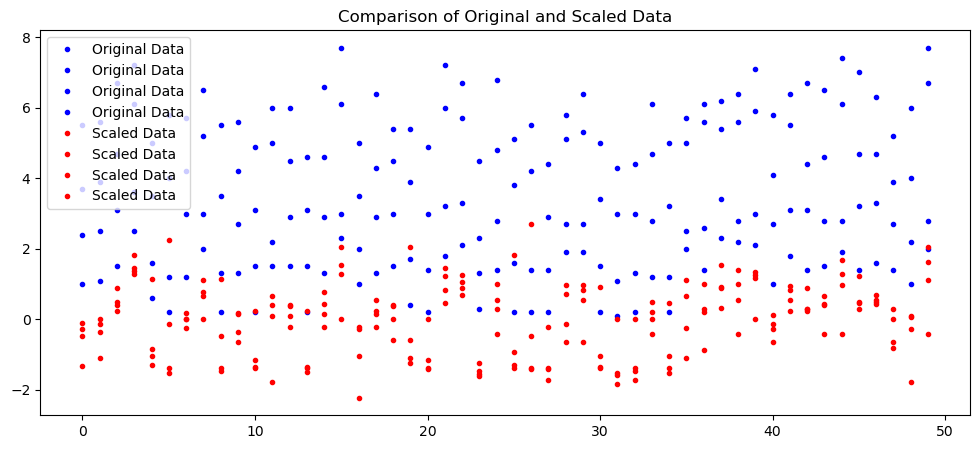

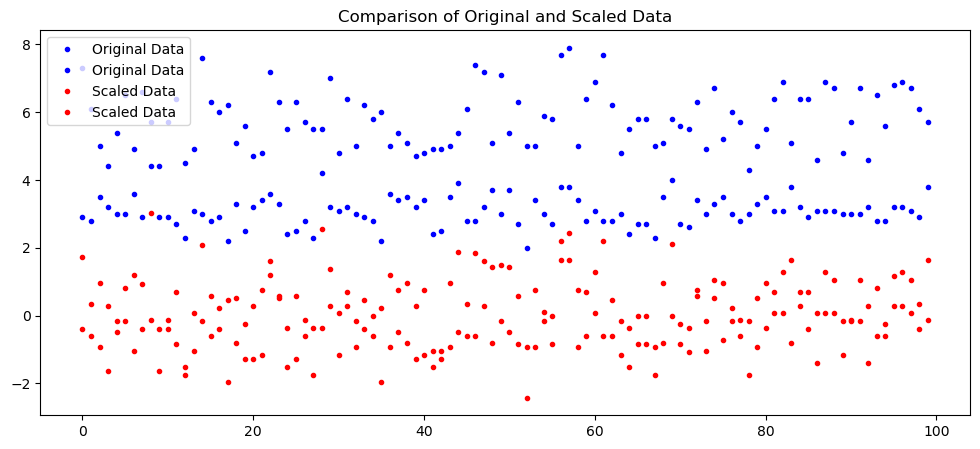

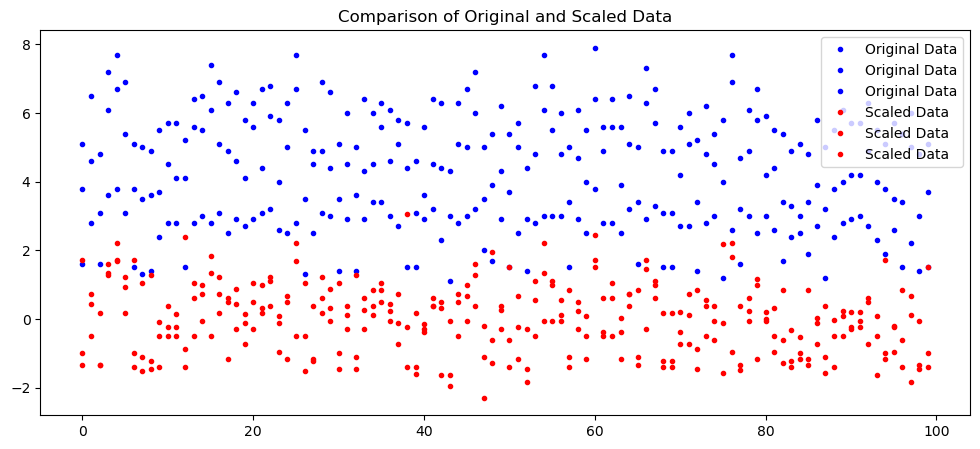

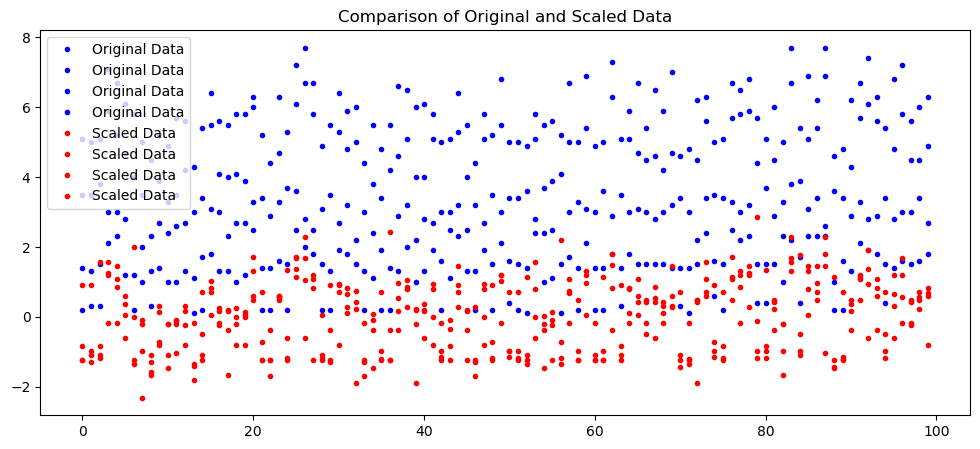

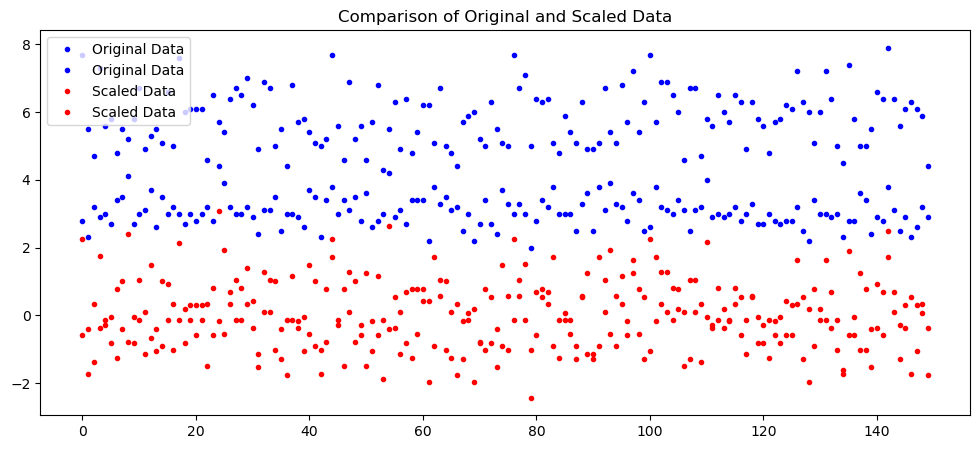

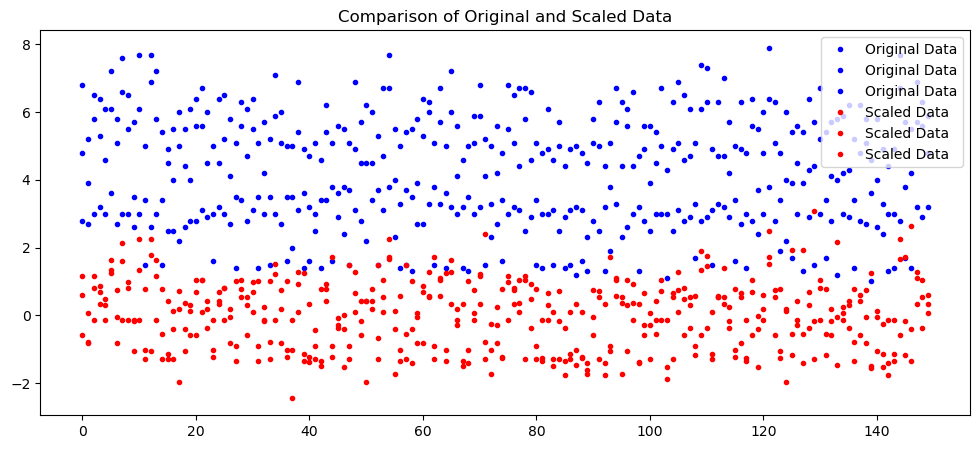

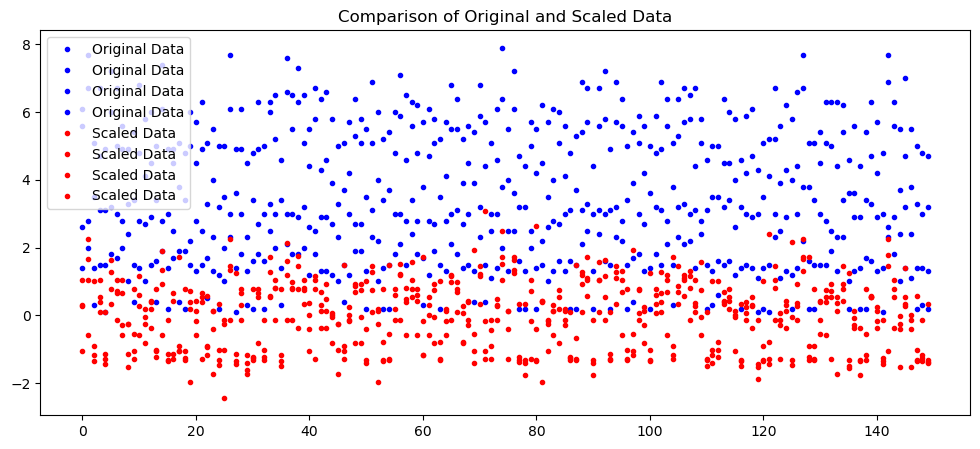

In [62]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Function to generate datasets with specified characteristics
def generate_dataset(n_rows, n_features):
    iris = load_iris()
    X, y = iris.data[:, :n_features], iris.target
    indices = np.random.choice(len(X), n_rows, replace=False)
    X_sampled, y_sampled = X[indices], y[indices]
    return X_sampled, y_sampled

# Function to scale data using z-score and save original copies
def scale_data(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled, scaler

# Function to visualize the original and scaled data on the same plot
# def visualize_data_comparison(X_original, X_scaled):
#     plt.figure(figsize=(12, 5))
#     plt.scatter(X_original[:, 0], X_original[:, 1], c='blue', label='Original Data')
#     plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c='red', label='Scaled Data')
#     plt.title('Comparison of Original and Scaled Data')
#     plt.legend()
#     plt.show()


def visualize_data_comparison(X_original, X_scaled,num_dimensions):
    plt.figure(figsize=(12, 5))
    plt.plot(X_original[:, :num_dimensions],'.', c='blue', label='Original Data')
    plt.plot(X_scaled[:, :num_dimensions], '.',c='red', label='Scaled Data')
    plt.title('Comparison of Original and Scaled Data')
    plt.legend()
    plt.show()

# Parameters
num_rows_values = [50, 100, 150]
num_dimensions_values = [2, 3, 4]
saved_datasets = {}

for num_rows in num_rows_values:
    for num_dimensions in num_dimensions_values:
        # Generate dataset
        X, y = generate_dataset(num_rows, num_dimensions)

        # Scale data and visualize
        X_scaled, scaler = scale_data(X)

        visualize_data_comparison(X, X_scaled,num_dimensions)
        key = f"rows_{num_rows}_dimensions_{num_dimensions}"
        saved_datasets[key] = {'X': X, 'y': y}
        


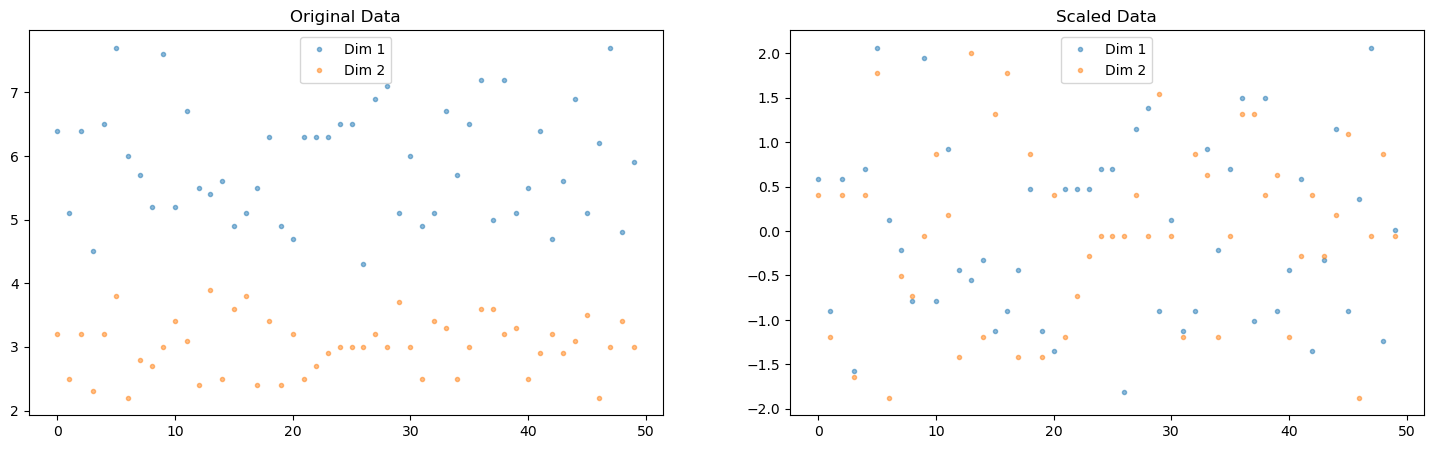

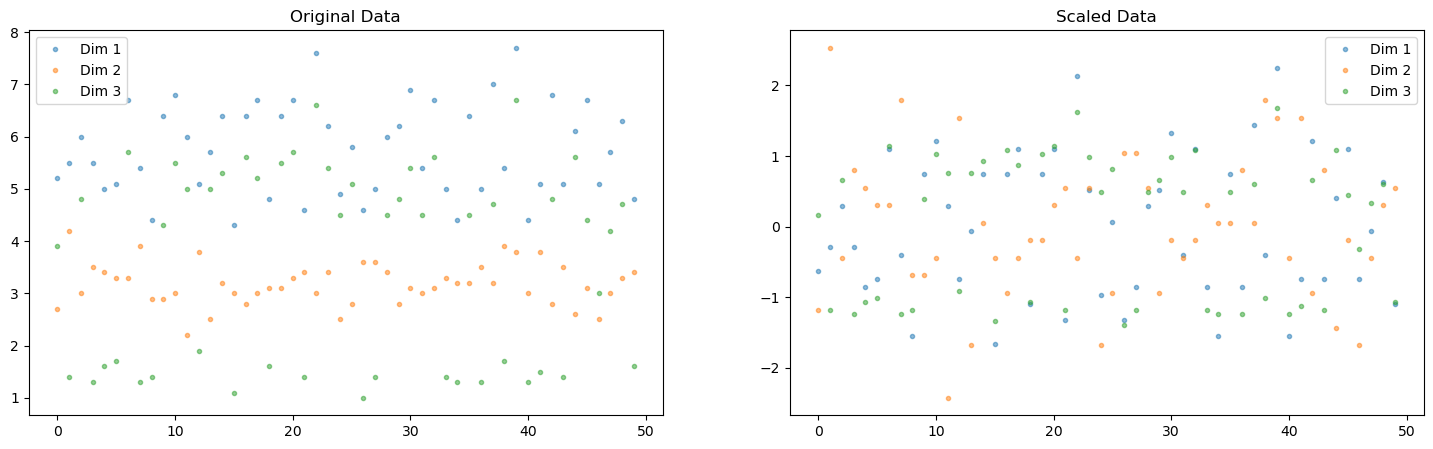

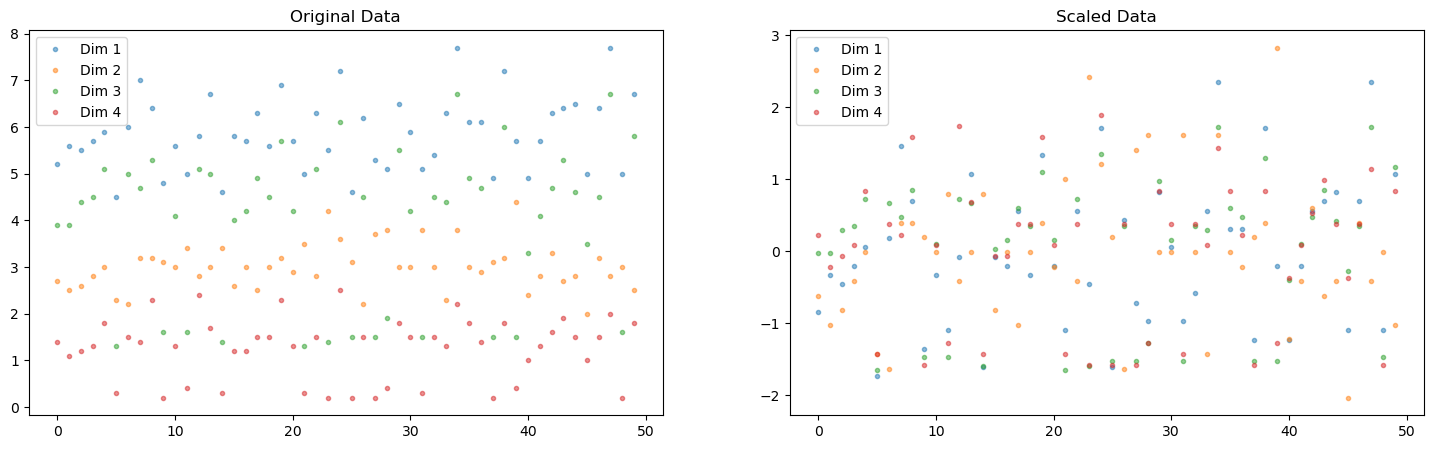

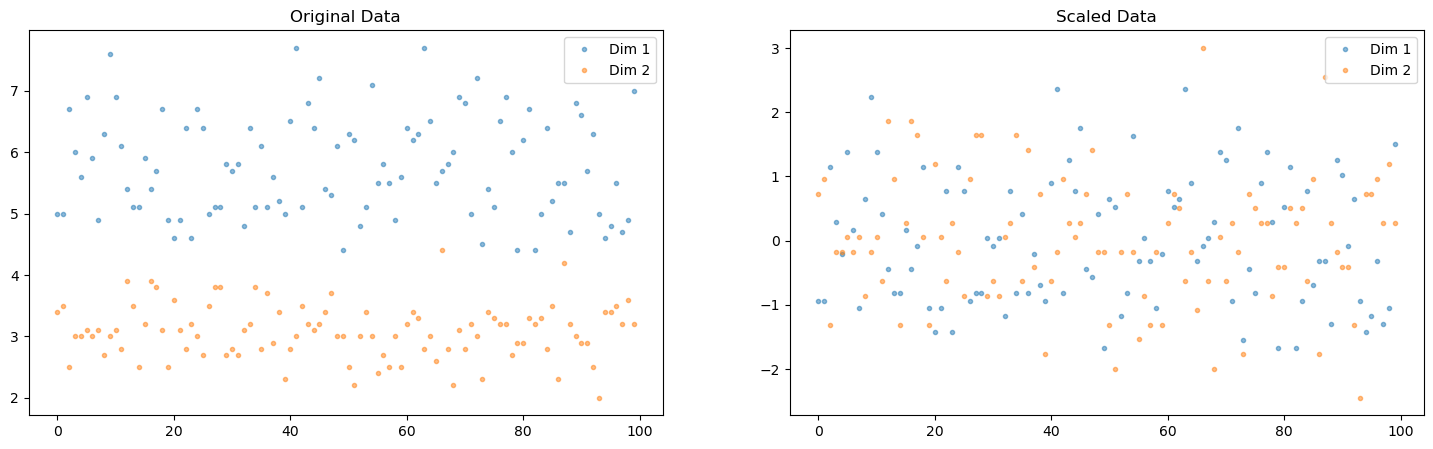

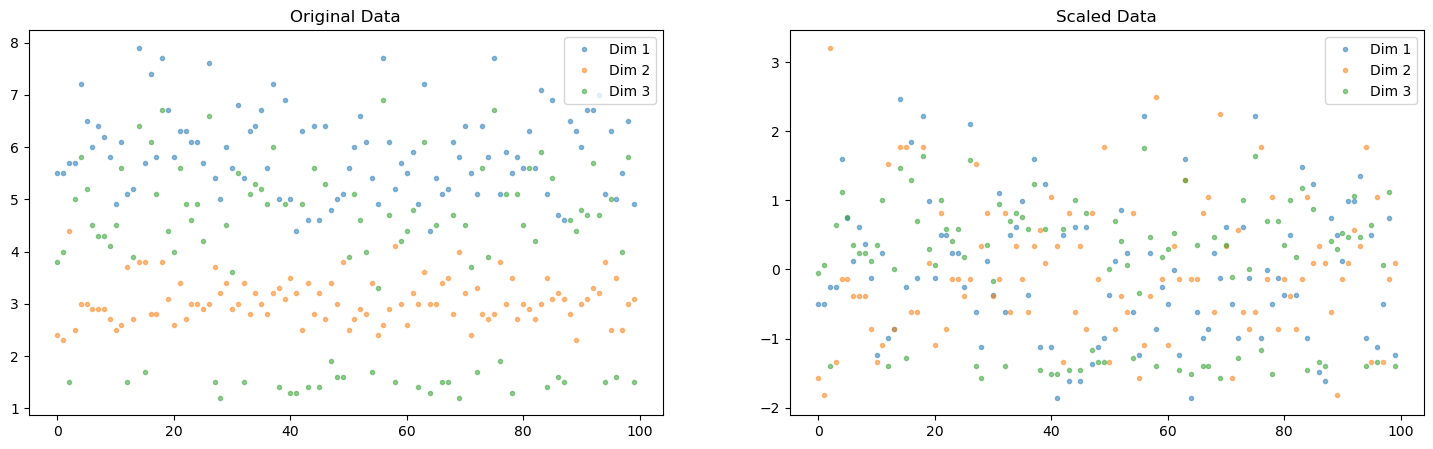

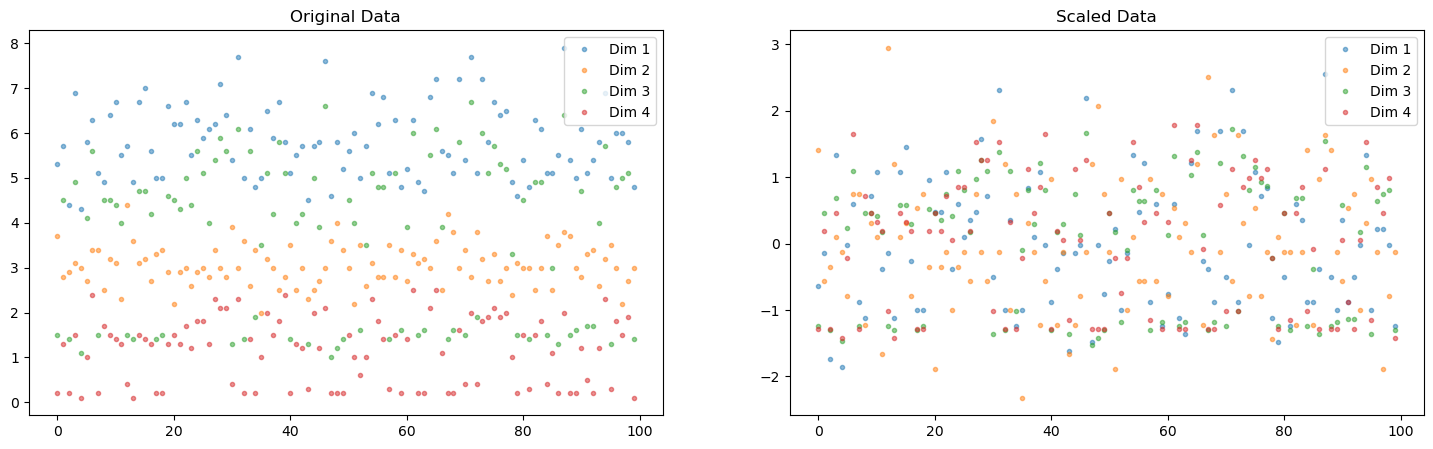

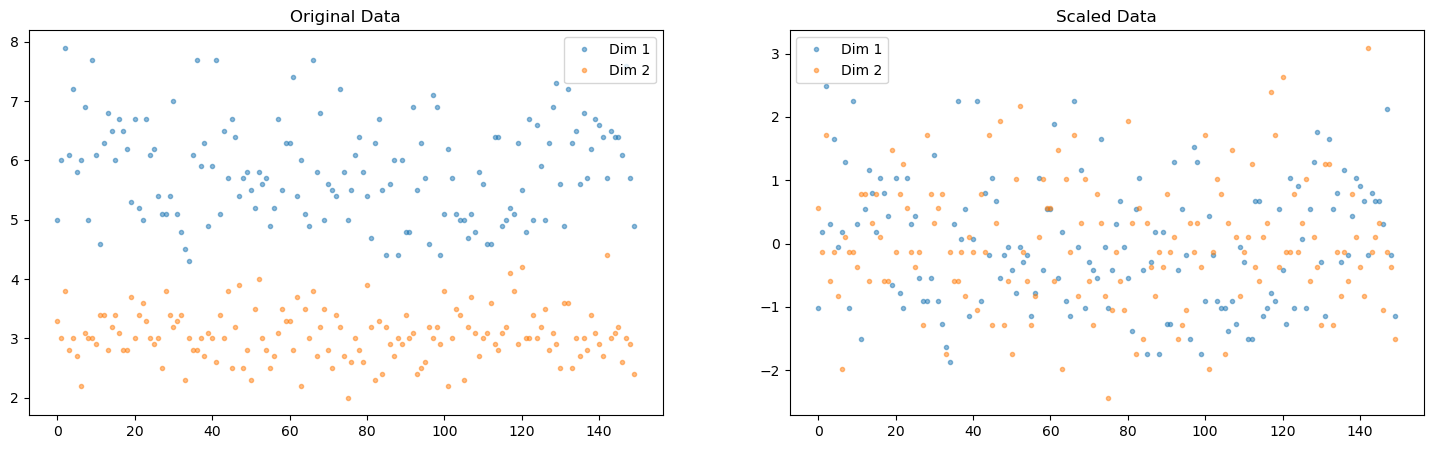

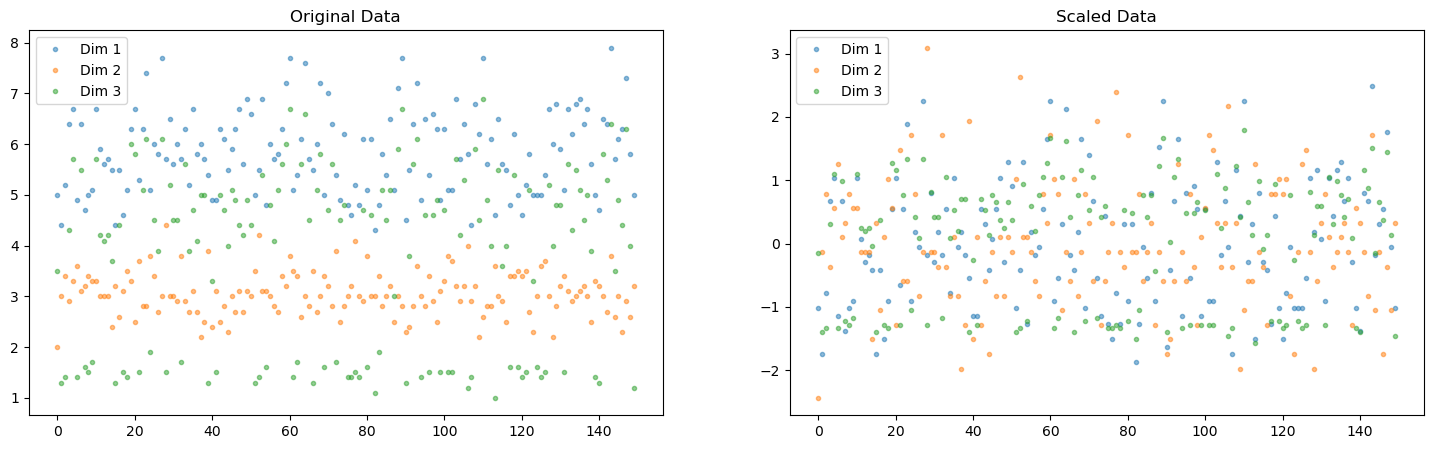

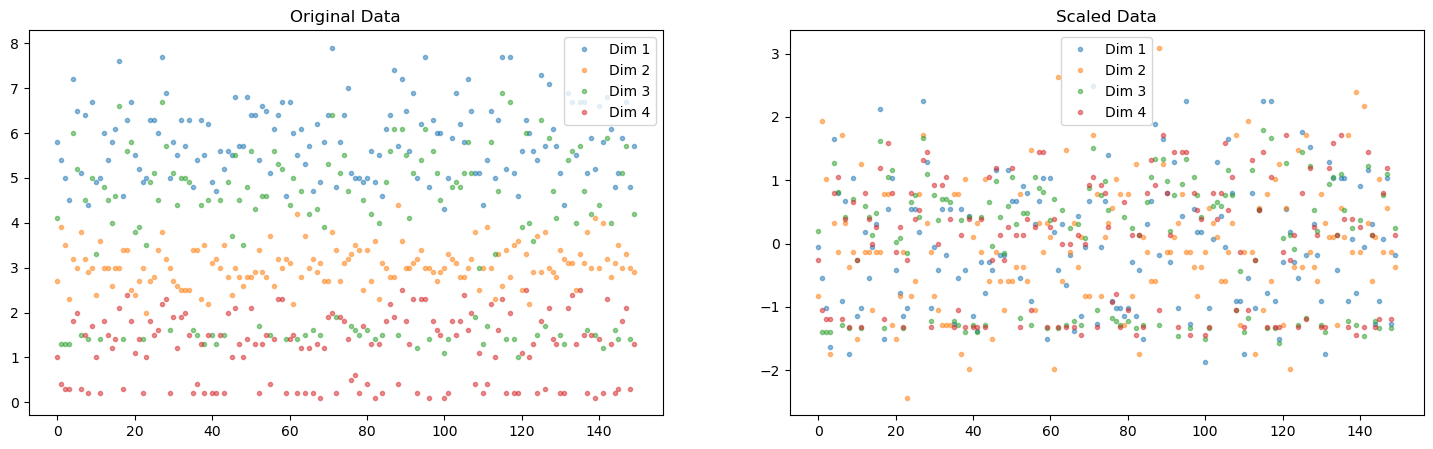

In [34]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

# Function to generate datasets with specified characteristics
def generate_dataset(n_rows, n_features):
    iris = load_iris()
    X, y = iris.data[:, :n_features], iris.target
    indices = np.random.choice(len(X), n_rows, replace=False)
    X_sampled, y_sampled = X[indices], y[indices]
    return X_sampled, y_sampled

# Function to scale data using z-score and save original copies
def scale_data(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    return X_scaled, scaler

def visualize_data_comparison(X_original, X_scaled, num_dimensions):
    fig, axes = plt.subplots(1, 2, figsize=(18, 5))

    # Plot for Original Data
    for dim in range(num_dimensions):
        axes[0].plot(X_original[:, dim], '.', label=f'Dim {dim + 1}', alpha=0.5)

    axes[0].set_title('Original Data')
    axes[0].legend()

    # Plot for Scaled Data
    for dim in range(num_dimensions):
        axes[1].plot(X_scaled[:, dim], '.', label=f'Dim {dim + 1}', alpha=0.5)

    axes[1].set_title('Scaled Data')
    axes[1].legend()

    plt.show()

# Parameters
num_rows_values = [50, 100, 150]
num_dimensions_values = [2, 3, 4]
saved_datasets = {}

for num_rows in num_rows_values:
    for num_dimensions in num_dimensions_values:
        # Generate dataset
        X, y = generate_dataset(num_rows, num_dimensions)

        # Scale data and visualize
        X_scaled, scaler = scale_data(X)

        visualize_data_comparison(X, X_scaled, num_dimensions)
        key = f"rows_{num_rows}_dimensions_{num_dimensions}"
        saved_datasets[key] = {'X': X, 'y': y}


_____

<font size=+1 color=#55FFAA> Part 3: MLP and SVC </font>

____

From `sklearn` import the [SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html) and [MLP](https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html) estimators. Read about these estimators, open a markdown cell, and give a summary of what they do (roughly) and what parameters you need to be aware of. What other options do you need to pay attention to if you do not use the defaults? How will you get scores for your results? 

Make a test-train split.

Instantiate both of these estimators as part of a [pipeline](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) that includes the scaling. [Read this carefully.](https://scikit-learn.org/0.15/modules/pipeline.html)

Perform the ML using `.fit()`. 

---
#### SVC summary

The Support Vector Classification (SVC) is a classification algorithm that belongs to the Support Vector Machines (SVM) family. It is used for binary and multiclass classification. The SVC aims to find a hyperplane in an N-dimensional space that separates the data into classes while maximizing the margin between the classes.

Parameters to be Aware of:

* C (Regularization Parameter): Controls the trade-off between smooth decision boundary and classifying training points correctly. A smaller C leads to a wider margin but may misclassify training points.

* kernel: Specifies the type of kernel used for the decision function. Common choices include 'linear', 'poly', 'rbf' (Radial basis function), and 'sigmoid'.

* gamma: Kernel coefficient for 'rbf', 'poly', and 'sigmoid'. It controls the influence of individual training samples. Higher values lead to a more complex decision boundary.

* degree: Degree of the polynomial kernel function ('poly'). Ignored by all other kernels.

* class_weight: Adjusts the importance of different classes. Useful when one class is more important than the others.

Other Options:

* Probability Estimates (probability): If set to True, the SVC will enable probability estimates for class predictions.

* Decision Function Shape (decision_function_shape): Determines the shape of the decision function. 'ovo' (one-vs-one) is used for multiclass classification, while 'ovr' (one-vs-the-rest) is another option.

#### MLP summary

The Multi-layer Perceptron (MLP) Classifier is a type of artificial neural network-based classifier. It is a feedforward neural network that consists of multiple layers of nodes, including an input layer, one or more hidden layers, and an output layer. It is capable of learning complex relationships in data and is widely used for various machine learning tasks, including classification.

Parameters to be Aware of:

* hidden_layer_sizes: Tuple representing the number of neurons in each hidden layer. Controls the architecture of the neural network.

* activation: Activation function for the hidden layers. Common choices include 'relu', 'logistic', and 'tanh'.

* solver: Optimization algorithm. 'adam' is often used, but 'lbfgs' and 'sgd' are also available.

* alpha: L2 regularization term, controls the penalty for large weights.

* learning_rate: Controls the learning rate for weight updates. 'constant', 'invscaling', and 'adaptive' are options.

Other Options:

* Batch Size (batch_size): Number of samples per gradient update.

* Maximum Iterations (max_iter): Maximum number of iterations for optimization algorithms.

* Early Stopping (early_stopping): If set to True, training will stop when validation score doesn't improve.

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_iris
from sklearn.preprocessing import label_binarize
import numpy as np
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import ConfusionMatrixDisplay

iris = load_iris()
y = iris.target
# y = y.astype(np.uint8)
# n_classes = len(set(y))

# Y = label_binarize(iris.target, classes=[*range(n_classes)])

# use for precision-recall plot 
# X_train, X_test, y_train, y_test = train_test_split(iris.data[:,:],
#                                                     Y,
#                                                     random_state = 42)


X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                    y,
                                                    random_state = 42)

In [24]:
# Instantiate SVC with scaling in a pipeline multiclass classifier
# svc_pipeline = Pipeline([
#         ('scaler',StandardScaler()),
#         ('classifier',OneVsRestClassifier(SVC(probability=True,random_state=42)))
#          ])

# ovo
svc_pipeline = Pipeline([
        ('scaler',StandardScaler()),
        ('classifier',SVC(probability=True,random_state=42))
         ])


# Fit and predict using SVC
svc_pipeline.fit(X_train, y_train)


# Instantiate MLP Classifier with scaling in a pipeline
mlp_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', MLPClassifier(random_state=42))
])

# Fit and predict using MLP Classifier
mlp_pipeline.fit(X_train, y_train)




/mnt/home/liangqi1/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


Pipeline(steps=[('scaler', StandardScaler()),
                ('classifier', MLPClassifier(random_state=42))])

In [25]:
from sklearn.metrics import precision_recall_curve, ConfusionMatrixDisplay,confusion_matrix
from sklearn.metrics import f1_score, classification_report,accuracy_score

y_pred = svc_pipeline.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(classification_report(y_test, y_pred))



Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [16]:

y_pred = mlp_pipeline.predict(X_test)
print(f"Accuracy: {accuracy_score(Y_test, y_pred):.2f}")
print(classification_report(Y_test, y_pred))

Accuracy: 1.00
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00        11
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



_____

<font size=+1 color=#55FFAA> Part 4: Scoring </font>

____

Score your results. Use these three methods:
* accuracy,
* precision-recall curves,
* confusion matrices.

Describe your findings with regard to scaling, dimensionality, and so on.

I am writing this before the Monday lecture, so I don't yet know which portions of this I covered. However, there are great descriptions in Chapter three of the textbook.

---
By removing the `('scaler',StandardScaler())` in the pipeline and change the number here `iris.data[:,:#]`, to adjust the features that can be selected. I found:

* Number of Features: As increasing the number of features, the classifiers have more information to work with,and improving performance. 

* Scaling: Both SVC and MLPClassifier benefit from feature scaling. Standardizing the features helps in achieving better convergence for these models.

Accuracy: 1.00


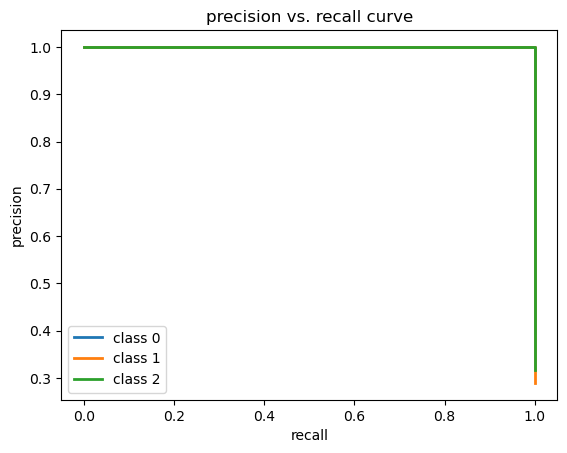

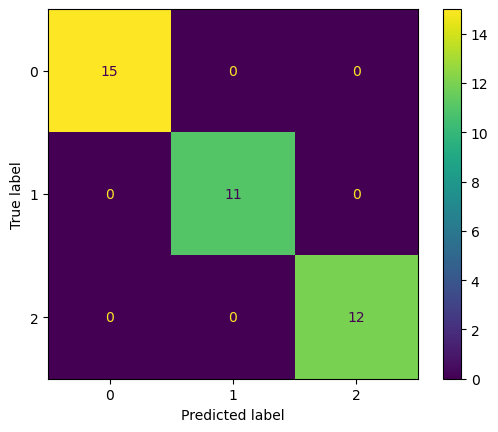

Mirco-Averaging F1 Score: 1.0

Accuracy: 0.89


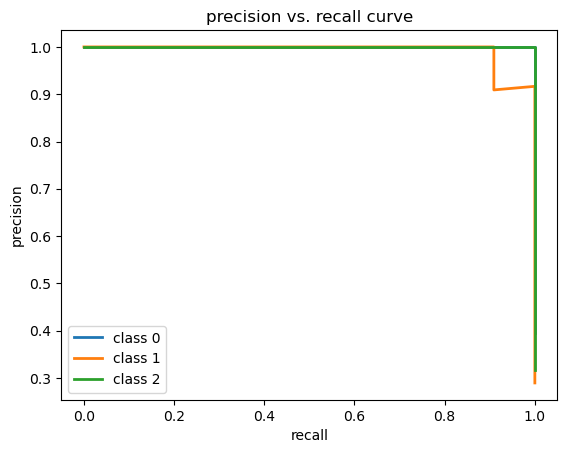

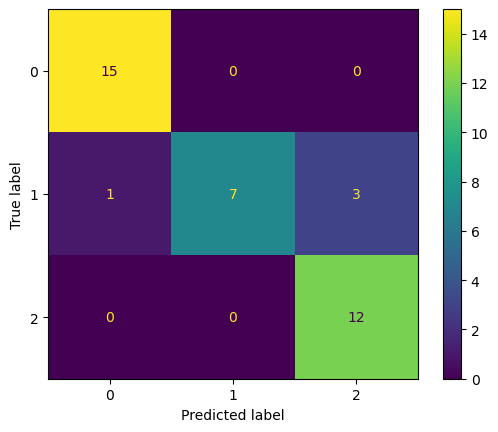

Mirco-Averaging F1 Score: 0.9066666666666667



In [65]:
from sklearn.metrics import precision_recall_curve, ConfusionMatrixDisplay,confusion_matrix
from sklearn.model_selection import cross_val_score,cross_val_predict
from sklearn.metrics import f1_score, classification_report,accuracy_score



def evaluate_model_multiclass(model, X_test, y_test,Y_test):
    y_pred = model.predict(X_test)
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")

    
    precision = dict()
    recall = dict()
    y_score = model.predict_proba(X_test)
    
    for i in range(n_classes):
        precision[i], recall[i], _ = precision_recall_curve(y_test[:, i], y_score[:, i])
        plt.plot(recall[i], precision[i], lw=2, label='class {}'.format(i))

    plt.xlabel("recall")
    plt.ylabel("precision")
    plt.legend(loc="best")
    plt.title("precision vs. recall curve")
    plt.show()

    # Confusion Matrix
    y_pred_m = np.argmax(y_pred, axis=1)
    cm = confusion_matrix(Y_test, y_pred_m, labels=model.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                           display_labels=model.classes_)
    disp.plot()
    plt.show()

    # Compute F1 score for each class separately
    f1_scores = f1_score(y_test, (y_score > 0.5).astype(int), average='micro')

    print(f"Mirco-Averaging F1 Score: {f1_scores}\n")



evaluate_model_multiclass(svc_pipeline,X_test,y_test,Y_test)

evaluate_model_multiclass(mlp_pipeline,X_test,y_test,Y_test)

_____

<font size=+1 color=#55FFAA> Part 5: Hyperparameter Tuning </font>

____

Choose one of the hyperparameters for each of the SVC and MLP. Perform a grid search over this value and optimize the estimators. Use several of the datasets you made to see how important tuning is for datasets that have different characteristics. 

How much better can you make the estimator over the defaults? 


In [41]:
from sklearn.model_selection import GridSearchCV 
# grid search for svc

#'classifier__estimator__C': [0.1, 1, 10, 100, 1000],
#'classifier__estimator__gamma': ['scale','auto']
# defining parameter range 
param_grid_svc = { 'classifier__estimator__kernel': ['rbf','linear','poly','sigmoid']}  

grid_svc = GridSearchCV(svc_pipeline,param_grid_svc,cv = 3,refit = True, verbose=1)

# Fit the grid search to the data
grid_svc.fit(X_train, y_train)


best_params = grid_svc.best_params_
print("Best Hyperparameters:", best_params)
   

Fitting 3 folds for each of 4 candidates, totalling 12 fits
Best Hyperparameters: {'classifier__estimator__kernel': 'rbf'}


In [39]:
# grid search for mlp
# defining parameter range

# 'classifier__hidden_layer_sizes': [(50,), (100,), (50, 50)],
# 'classifier__activation': ['relu', 'tanh'],
# 'classifier__alpha': [0.0001, 0.001, 0.01],
# 'classifier__max_iter': [500, 1000, 1500]
param_grid_mlp = {'classifier__max_iter': [500, 1000, 1500]}  

grid_mlp = GridSearchCV(mlp_pipeline,param_grid_mlp,cv = 3,refit = True, verbose=1)

# Fit the grid search to the data
grid_mlp.fit(X_train, y_train)


best_params = grid_mlp.best_params_
print("Best Hyperparameters:", best_params)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


/mnt/home/liangqi1/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/mnt/home/liangqi1/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/mnt/home/liangqi1/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


Best Hyperparameters: {'classifier__max_iter': 500}


/mnt/home/liangqi1/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [69]:
from sklearn.metrics import f1_score
# MLP train on different dataset

nr_nd = [key for key in saved_datasets.keys()]

# Instantiate MLP Classifier with scaling in a pipeline
mlp_pipeline_new = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', MLPClassifier(max_iter=500, random_state=42))
])

def ana_model_on_diff_sets(model):
    for i in range(len(nr_nd)):
        dataset = saved_datasets[nr_nd[i]]
        X = dataset['X']
        y = dataset['y']

        y = y.astype(np.uint8)
        n_classes = len(set(y))

        Y = label_binarize(y, classes=[*range(n_classes)])

        # Split data for training and testing
        X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

        # Fit and predict using MLP Classifier
        model.fit(X_train, y_train)

        # Predict probabilities for the training set
        y_score = model.predict_proba(X_test)

        # Compute F1 score for each class separately
        f1_scores = f1_score(y_test, (y_score > 0.5).astype(int), average='micro')

        print(f"{nr_nd[i]}: Mirco-Averaging F1 Score: {f1_scores}\n")
        

ana_model_on_diff_sets(mlp_pipeline_new)


/mnt/home/liangqi1/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/mnt/home/liangqi1/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


rows_50_dimensions_2: Mirco-Averaging F1 Score: 0.6923076923076923

rows_50_dimensions_3: Mirco-Averaging F1 Score: 0.9230769230769231



/mnt/home/liangqi1/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/mnt/home/liangqi1/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


rows_50_dimensions_4: Mirco-Averaging F1 Score: 1.0

rows_100_dimensions_2: Mirco-Averaging F1 Score: 0.5652173913043478



/mnt/home/liangqi1/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/mnt/home/liangqi1/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


rows_100_dimensions_3: Mirco-Averaging F1 Score: 0.92

rows_100_dimensions_4: Mirco-Averaging F1 Score: 0.96



/mnt/home/liangqi1/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
/mnt/home/liangqi1/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


rows_150_dimensions_2: Mirco-Averaging F1 Score: 0.7368421052631579

rows_150_dimensions_3: Mirco-Averaging F1 Score: 0.9599999999999999

rows_150_dimensions_4: Mirco-Averaging F1 Score: 0.935064935064935



/mnt/home/liangqi1/anaconda3/envs/homl3/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [71]:
# svc train on different dataset

svc_pipeline_new = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', OneVsRestClassifier(SVC(
        probability=True,random_state=42)))
])

for i in range(len(nr_nd)):
    dataset = saved_datasets[nr_nd[i]]
    X = dataset['X']
    y = dataset['y']

    y = y.astype(np.uint8)
    n_classes = len(set(y))

    Y = label_binarize(y, classes=[*range(n_classes)])

    # Split data for training and testing
    X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

    # Fit and predict using MLP Classifier
    svc_pipeline_new.fit(X_train, y_train)

    # Predict probabilities for the training set
    y_score = svc_pipeline_new.predict_proba(X_test)

    # Compute F1 score for each class separately
    f1_scores = f1_score(y_test, (y_score > 0.5).astype(int), average='micro')

    print(f"{nr_nd[i]}: Mirco-Averaging F1 Score: {f1_scores}\n")


rows_50_dimensions_2: Mirco-Averaging F1 Score: 0.47058823529411764

rows_50_dimensions_3: Mirco-Averaging F1 Score: 0.9230769230769231

rows_50_dimensions_4: Mirco-Averaging F1 Score: 1.0

rows_100_dimensions_2: Mirco-Averaging F1 Score: 0.5581395348837209

rows_100_dimensions_3: Mirco-Averaging F1 Score: 0.8571428571428572

rows_100_dimensions_4: Mirco-Averaging F1 Score: 1.0

rows_150_dimensions_2: Mirco-Averaging F1 Score: 0.7027027027027027

rows_150_dimensions_3: Mirco-Averaging F1 Score: 0.9210526315789473

rows_150_dimensions_4: Mirco-Averaging F1 Score: 0.9333333333333332



---
#### Answer:
For `svc` after gridsearchcv it shows default hyperparameter already give the best valus. For `mlp` I use gridsearchcv for max_iter and the best value is 500. 

* For numbers of rows, it always shows with more rows (more data) the model will have better f1 score
* For numbers of Dimensions, the result in the 150 rows shows that data with 3 dimensions will train the model with a higher f1 score which may because of the 4th column of feature sometimes can confuse the model to predict the right label.


_____

<font size=+1 color=#55FFAA> Part 6: Analysis </font>

____

In your project, you will need to draw conclusions. Based on everything you did above, write several paragraphs on what you learned from all of the previous steps. Feel free to add more plots if you need them. Think of this like a mini-report for a project. 

#### Conclusion

In the initial exploratory data analysis (EDA) phase, we utilized pair plots to discern relationships among the three classes in the iris dataset. The visualizations highlighted a clear separation of class 1 from classes 2 and 3, while also revealing substantial overlap between the latter two. This observation underscored the significance of the model's ability to accurately predict classes 2 and 3 during training, serving as a crucial indicator for evaluating model performance. The exploration of class relationships through EDA became pivotal in understanding the intricacies of the dataset and informed subsequent steps in model development.

Moving forward, the investigation delved into the importance of preprocessing, specifically in terms of dataset size and dimensionality. By systematically altering the number of rows and dimensions and subsequently rescaling the data, we gleaned valuable insights into the critical role of preprocessing in enhancing model training. The findings emphasized that employing appropriate rescaling methods is imperative for optimizing model performance, thereby emphasizing the importance of meticulous data preprocessing in the overall model development pipeline.

Our experimentation with various classification algorithms shed light on the nuanced nature of model selection. Rather than relying solely on a single classifier and tuning hyperparameters, the exploration of diverse classification methods emerged as a more robust approach. This approach allowed us to comprehensively assess the strengths and weaknesses of different classifiers, ultimately aiding in the selection of the most suitable model for the given dataset.

In the assessment of model performance metrics, the traditional reliance on accuracy scores was challenged. The adoption of alternative metrics such as ROC curves, precision-recall plots, and F1 scores proved to be more insightful in comparing classifier performance. This shift highlighted the necessity of employing metrics that consider factors beyond overall accuracy, providing a more nuanced understanding of a model's predictive capabilities.

Lastly, the exploration of hyperparameter tuning and its interaction with dataset size and dimensionality showcased the delicate balance required for optimal model prediction. While larger datasets proved beneficial, the influence of feature-rich datasets on model performance was contingent on the information embedded in the features and its correlation to the target variables. This nuanced perspective underscored the importance of considering both data volume and feature relevance in the pursuit of an optimized model. Overall, these multifaceted investigations provided a comprehensive understanding of the interplay between data characteristics, preprocessing steps, model selection, and performance metrics in the development of robust predictive models.